The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [111]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!


# Load the CSV file
nobel = pd.read_csv('nobel.csv')

# Display the first few rows of the dataframe
nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France




## Analyze Nobel Prize winner data and identify patterns by answering the following questions:










#### What is the most commonly awarded gender and birth country?

#### Store your answers as string variables top_gender and top_country.

In [112]:
# Group by 'Birth Country' and 'Sex' columns, then count the occurrences
gender_counts_by_country = nobel.groupby(['birth_country', 'sex']).size().unstack(fill_value=0)

# Display the result
gender_counts_by_country

sex,Female,Male
birth_country,,
Argentina,0,4
Australia,1,9
Austria,1,15
Austria-Hungary (Austria),0,1
Austria-Hungary (Bosnia and Herzegovina),0,1
...,...,...
Venezuela,0,1
Vietnam,0,1
W&uuml;rttemberg (Germany),0,1


In [113]:


# Count the total number of individuals by country and sort in descending order
total_counts_by_country = nobel.groupby('birth_country').size().sort_values(ascending=False)

# Display the result
total_counts_by_country

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
French protectorate of Tunisia (now Tunisia)      1
Free City of Danzig (Poland)                      1
Faroe Islands (Denmark)                           1
Ethiopia                                          1
Yemen                                             1
Length: 129, dtype: int64

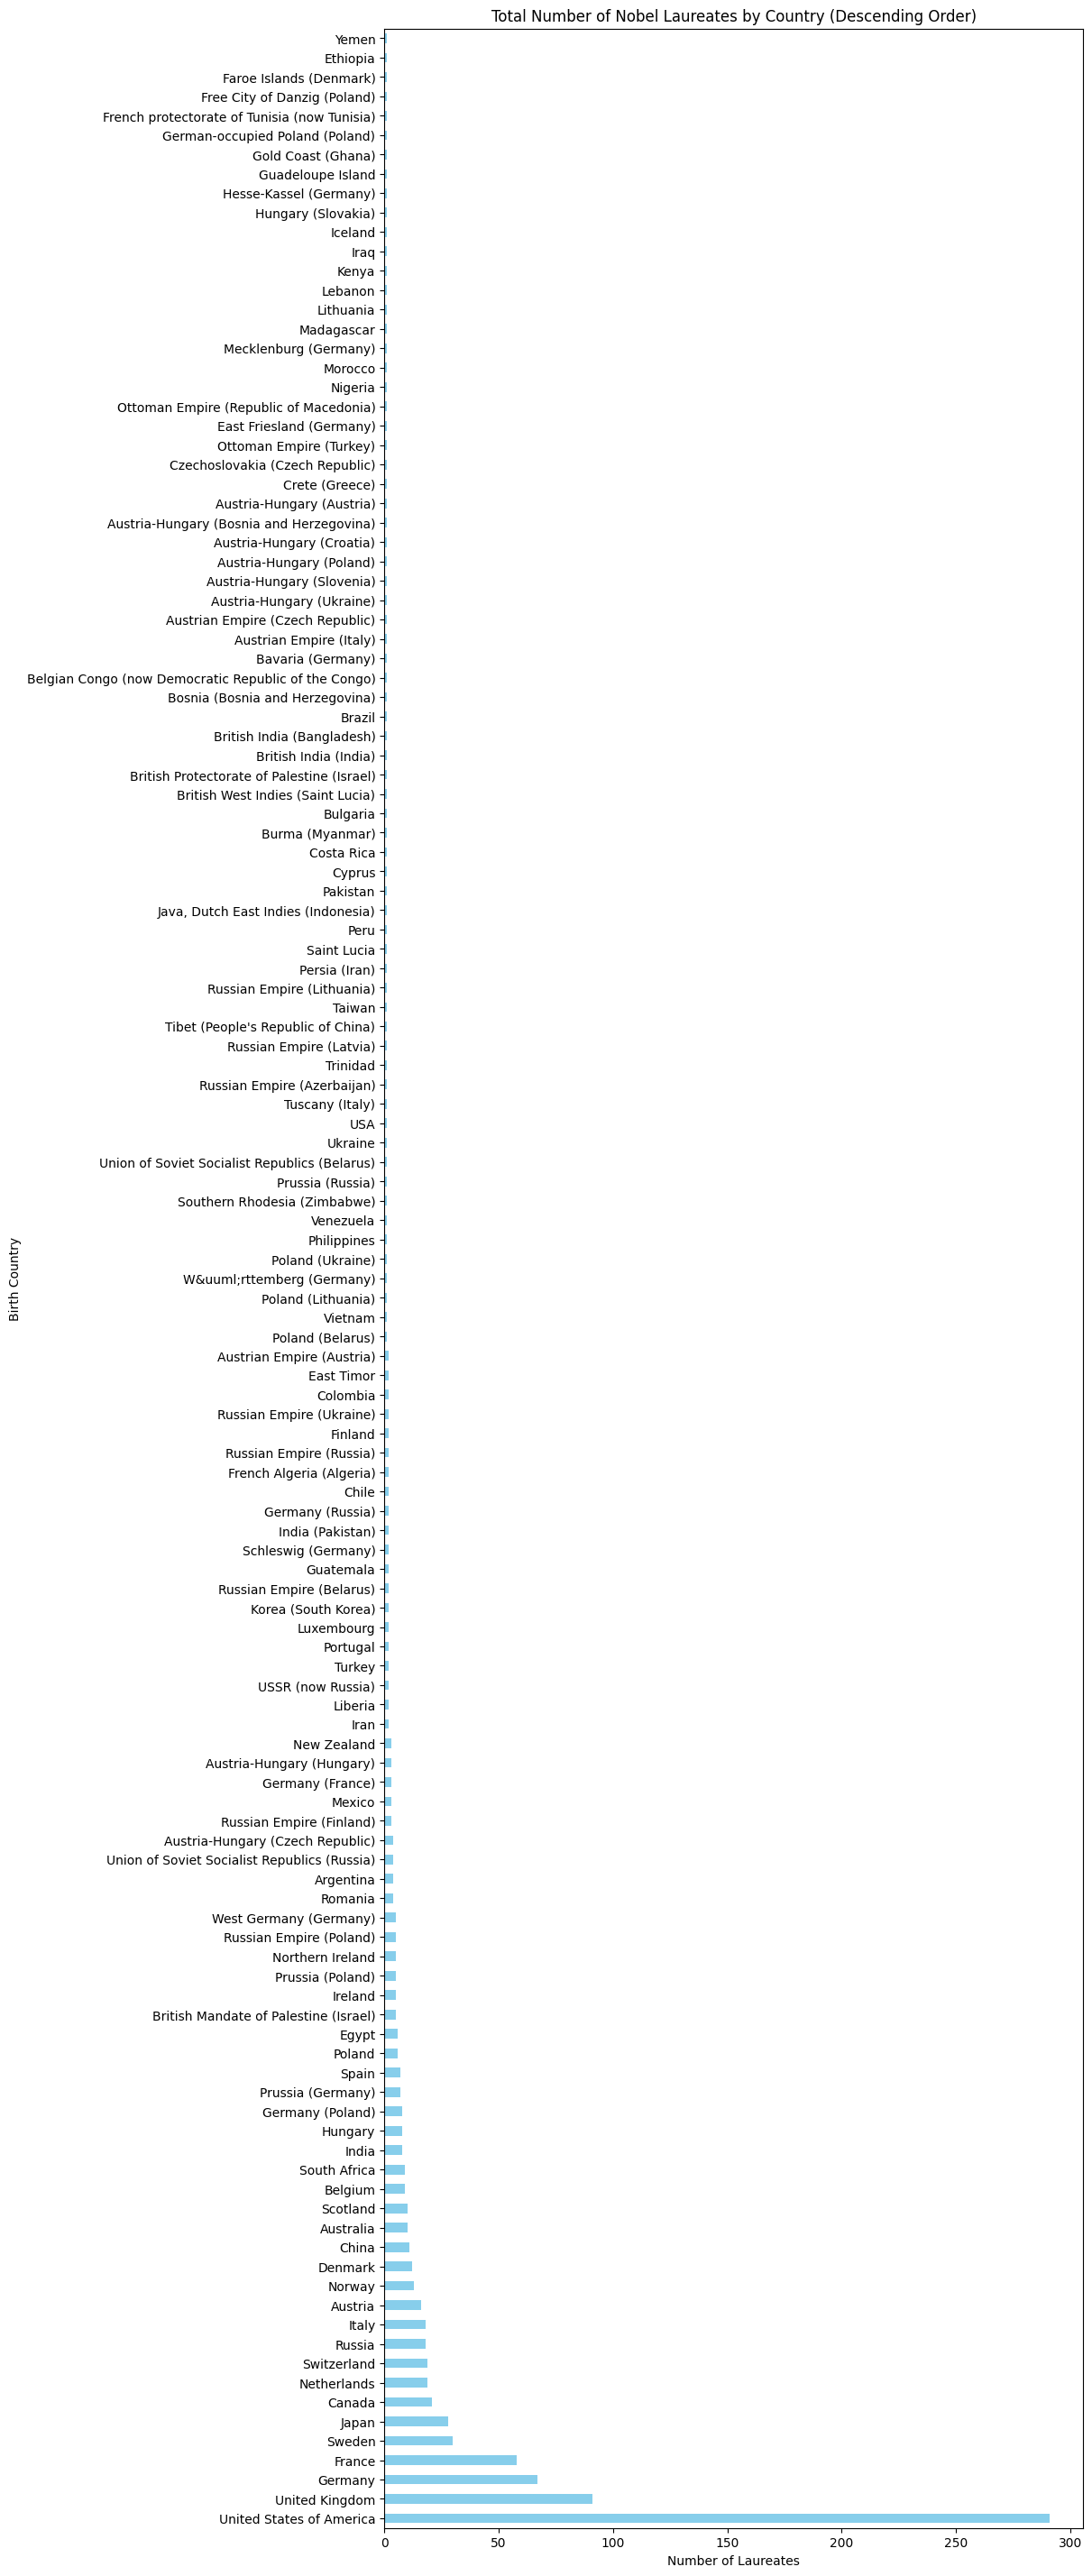

In [114]:
# Plot a horizontal bar chart
total_counts_by_country.plot(kind='barh', figsize=(10, 36), color='skyblue')

# Add titles and labels
plt.title('Total Number of Nobel Laureates by Country (Descending Order)')
plt.xlabel('Number of Laureates')
plt.ylabel('Birth Country')

# Show the plot
plt.show()

In [115]:
# Get the most commonly awarded birth country
top_country = total_counts_by_country.idxmax()

# Print the most commonly awarded birth country
print("The most commonly awarded birth country is:", top_country)

The most commonly awarded birth country is: United States of America


In [116]:
# Count the number of individuals by gender and sort in descending order
total_counts_by_gender = nobel.groupby('sex').size().sort_values(ascending=False)

# Get the most commonly awarded gender
top_gender = total_counts_by_gender.idxmax()

# Print the most commonly awarded gender
print("The most commonly awarded gender is:", top_gender)

The most commonly awarded gender is: Male


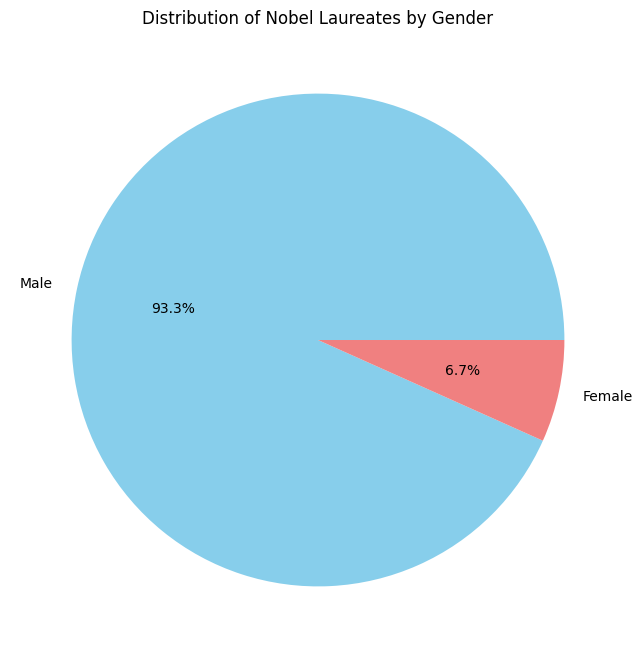

In [117]:
# Count the number of male and female laureates
gender_counts = nobel['sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Add a title
plt.title('Distribution of Nobel Laureates by Gender')

# Show the plot
plt.show()

#### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

#### Store this as an integer called max_decade_usa.

In [118]:
# Convert 'year' to integer
nobel['year'] = nobel['year'].astype(int)

# Create a new column 'decade' by calculating the decade from the year
nobel['decade'] = (nobel['year'] // 10) * 10


# Normalize 'birth_country' for US entries
nobel['birth_country'] = nobel['birth_country'].replace({
    'USA': 'United States of America',
    'United States of America': 'United States of America'
})

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [119]:
# Count the number of US-born Nobel Prize winners and total winners by decade
us_winners_by_decade = nobel[nobel['birth_country'] == 'United States of America'].groupby('decade').size()
total_winners_by_decade = nobel.groupby('decade').size()

# Compute the ratio of US-born winners to total winners for each decade
ratio_by_decade = us_winners_by_decade / total_winners_by_decade




In [120]:
us_winners_by_decade

decade
1900     1
1910     3
1920     4
1930    14
1940    13
1950    21
1960    21
1970    33
1980    31
1990    42
2000    52
2010    39
2020    18
dtype: int64

In [121]:
# Identify the decade with the highest ratio
max_decade_usa = ratio_by_decade.idxmax()
top_ratio = ratio_by_decade.max()

print(f"The decade with the highest ratio of US-born Nobel Prize winners is {max_decade_usa} with a ratio of {top_ratio:.2f}.")


The decade with the highest ratio of US-born Nobel Prize winners is 2000 with a ratio of 0.42.


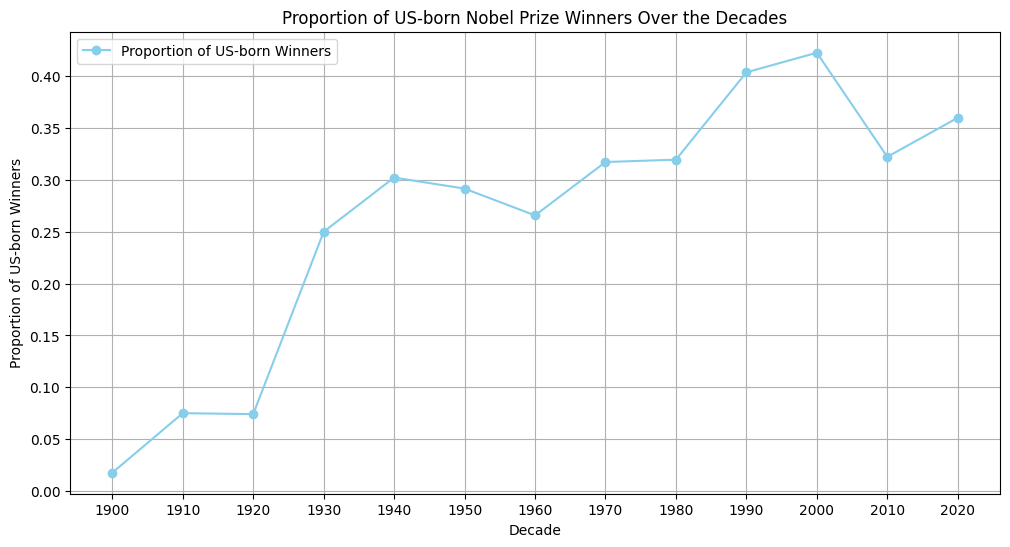

In [122]:
# Plot a line chart to show the proportion of US-born winners over the decades
plt.figure(figsize=(12, 6))
plt.plot(ratio_by_decade.index, ratio_by_decade.values, marker='o', linestyle='-', color='skyblue', label='Proportion of US-born Winners')

# Add titles and labels
plt.title('Proportion of US-born Nobel Prize Winners Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Proportion of US-born Winners')
plt.grid(True)
plt.xticks(ratio_by_decade.index)  # Ensure all decades are shown on x-axis
plt.legend()

# Show the plot
plt.show()

#### Which decade and Nobel Prize category combination had the highest proportion of female laureates?
#### Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.¶

In [123]:
# Count the number of female laureates and total laureates by decade and category
female_counts = nobel[nobel['sex'] == 'Female'].groupby(['decade', 'category']).size().unstack(fill_value=0)

female_counts


category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,0,0,1,0,1,1
1910,1,0,0,0,0,0
1920,0,0,2,0,0,0
1930,1,0,1,0,1,0
1940,0,0,1,1,1,0
1960,1,0,1,0,0,1
1970,0,0,0,1,3,0
1980,0,0,0,3,1,0
1990,0,0,3,1,3,0


In [124]:
total_counts = nobel.groupby(['decade', 'category']).size().unstack(fill_value=0)
total_counts

category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,9,0,10,11,14,13
1910,8,0,9,6,7,10
1920,10,0,10,11,11,12
1930,13,0,9,14,9,11
1940,9,0,6,14,7,7
1950,14,0,10,20,8,20
1960,15,2,11,25,9,17
1970,15,15,11,25,13,25
1980,21,10,10,23,11,22


In [125]:
# Compute the proportion of female laureates for each decade and category
proportion_female = female_counts / total_counts

proportion_female

category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,0.000000,NaN,0.100000,0.000000,0.071429,0.076923
1910,0.125000,NaN,0.000000,0.000000,0.000000,0.000000
1920,0.000000,NaN,0.200000,0.000000,0.000000,0.000000
1930,0.076923,NaN,0.111111,0.000000,0.111111,0.000000
1940,0.000000,NaN,0.166667,0.071429,0.142857,0.000000
1950,NaN,NaN,NaN,NaN,NaN,NaN
1960,0.066667,0.000000,0.090909,0.000000,0.000000,0.058824
1970,0.000000,0.000000,0.000000,0.040000,0.230769,0.000000
1980,0.000000,0.000000,0.000000,0.130435,0.090909,0.000000


In [126]:
proportion_female = proportion_female.fillna(0)
proportion_female 



category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,0.000000,0.000000,0.100000,0.000000,0.071429,0.076923
1910,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1930,0.076923,0.000000,0.111111,0.000000,0.111111,0.000000
1940,0.000000,0.000000,0.166667,0.071429,0.142857,0.000000
1950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1960,0.066667,0.000000,0.090909,0.000000,0.000000,0.058824
1970,0.000000,0.000000,0.000000,0.040000,0.230769,0.000000
1980,0.000000,0.000000,0.000000,0.130435,0.090909,0.000000


In [127]:
print(type(proportion_female))

<class 'pandas.core.frame.DataFrame'>


In [134]:
# Find the maximum proportion value
max_value = proportion_female.max().max()  # Find the highest value in the DataFrame

# Locate the position of this maximum value
# Note: `idxmax()` returns the index of the first occurrence of the maximum value
max_proportion_index = proportion_female.stack()[proportion_female.stack() == max_value].index[0]

# Create the dictionary with the decade as the key and category as the value
max_female_dict = {max_proportion_index[0]: max_proportion_index[1]}

print("The decade and category with the highest proportion of female laureates is:")
print(max_female_dict)

The decade and category with the highest proportion of female laureates is:
{2020: 'Literature'}


In [135]:
# Reset index to turn MultiIndex into columns
proportion_female


category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,0.000000,0.000000,0.100000,0.000000,0.071429,0.076923
1910,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1930,0.076923,0.000000,0.111111,0.000000,0.111111,0.000000
1940,0.000000,0.000000,0.166667,0.071429,0.142857,0.000000
1950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1960,0.066667,0.000000,0.090909,0.000000,0.000000,0.058824
1970,0.000000,0.000000,0.000000,0.040000,0.230769,0.000000
1980,0.000000,0.000000,0.000000,0.130435,0.090909,0.000000


In [136]:
# Reset index to make 'decade' a column
proportion_female_reset = proportion_female.reset_index()
proportion_female_reset


category,decade,Chemistry,Economics,Literature,Medicine,Peace,Physics
0,1900,0.000000,0.000000,0.100000,0.000000,0.071429,0.076923
1,1910,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1920,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
3,1930,0.076923,0.000000,0.111111,0.000000,0.111111,0.000000
4,1940,0.000000,0.000000,0.166667,0.071429,0.142857,0.000000
5,1950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1960,0.066667,0.000000,0.090909,0.000000,0.000000,0.058824
7,1970,0.000000,0.000000,0.000000,0.040000,0.230769,0.000000
8,1980,0.000000,0.000000,0.000000,0.130435,0.090909,0.000000
9,1990,0.000000,0.000000,0.300000,0.050000,0.176471,0.000000


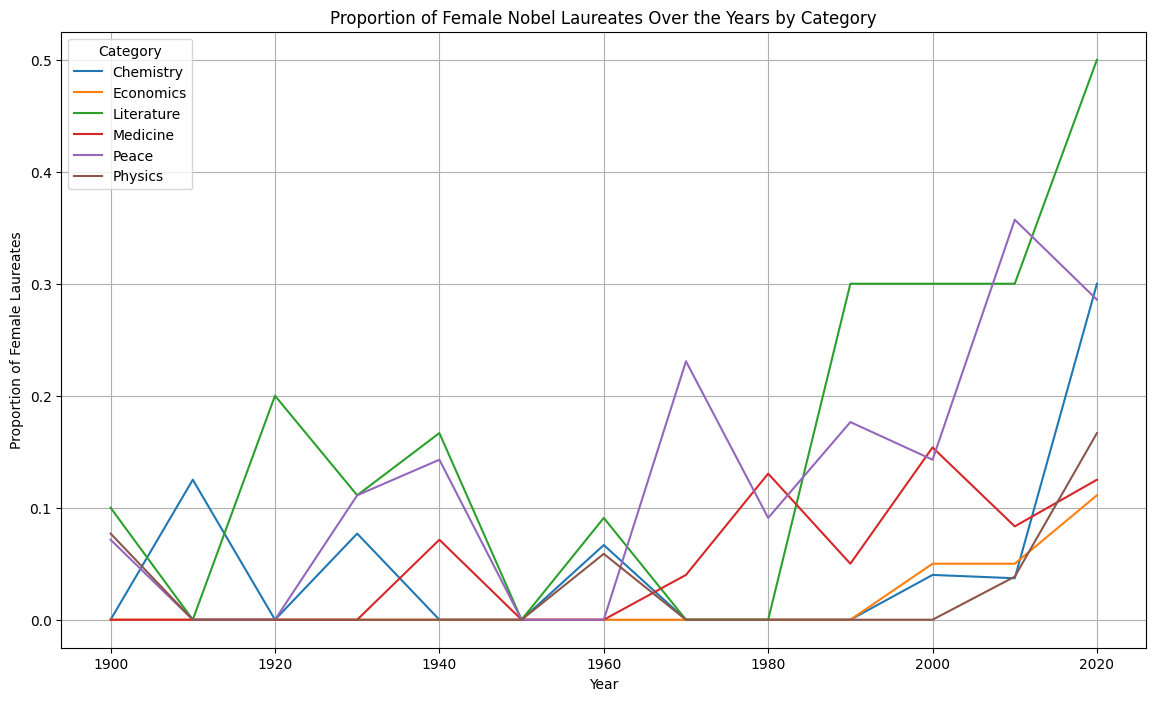

In [140]:
# Exclude the 'decade' columns for plotting
columns_to_plot = proportion_female_reset.drop(columns=['decade'])

# Plotting
plt.figure(figsize=(14, 8))

# Plot each category
for category in columns_to_plot.columns:
    #print(category)
    plt.plot(proportion_female_reset['decade'], proportion_female_reset[category], label=category)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of Female Laureates')
plt.title('Proportion of Female Nobel Laureates Over the Years by Category')
plt.legend(title='Category')
plt.grid(True)
plt.show()

#### Who was the first woman to receive a Nobel Prize, and in what category?

#### Save your string answers as first_woman_name and first_woman_category.

In [143]:
# Assuming your DataFrame is named 'nobel'

# Filter for female laureates
female_nobel = nobel[nobel['sex'] == 'Female']

# Sort by year in ascending order
female_nobel_sorted = female_nobel.sort_values(by='year', ascending=True)

# Get the first female Nobel Prize winner
first_female_nobel = female_nobel_sorted.iloc[0]

# Extract the first woman's birth country (assuming birth_country is being used as a proxy for name)
first_woman_name = first_female_nobel['birth_country']
first_woman_category = first_female_nobel['category']
first_woman_name = first_female_nobel['full_name']

# Display the 
print(f"The first woman to receive a Nobel Prize was {first_woman_name}, and she won in the category: {first_woman_category}.")
print(f"The first woman to receive a Nobel Prize was from {first_woman_name}, and she won in the category: {first_woman_category}.")

The first woman to receive a Nobel Prize was Marie Curie, née Sklodowska, and she won in the category: Physics.
The first woman to receive a Nobel Prize was from Marie Curie, née Sklodowska, and she won in the category: Physics.


#### Which individuals or organizations have won more than one Nobel Prize throughout the years?

#### Store the full names in a list named repeat_list.

In [150]:
# Group by 'full_name' and count the occurrences
name_counts = nobel.groupby('full_name').size()

# Filter to find those who have won more than one Nobel Prize
repeat_winners = name_counts[name_counts >= 2]

# Extract the full names into a list
repeat_list = repeat_winners.index.tolist()

# Display the list of repeat Nobel Prize winners
print("Individuals or organizations with more than one Nobel Prize:", repeat_list)

Individuals or organizations with more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


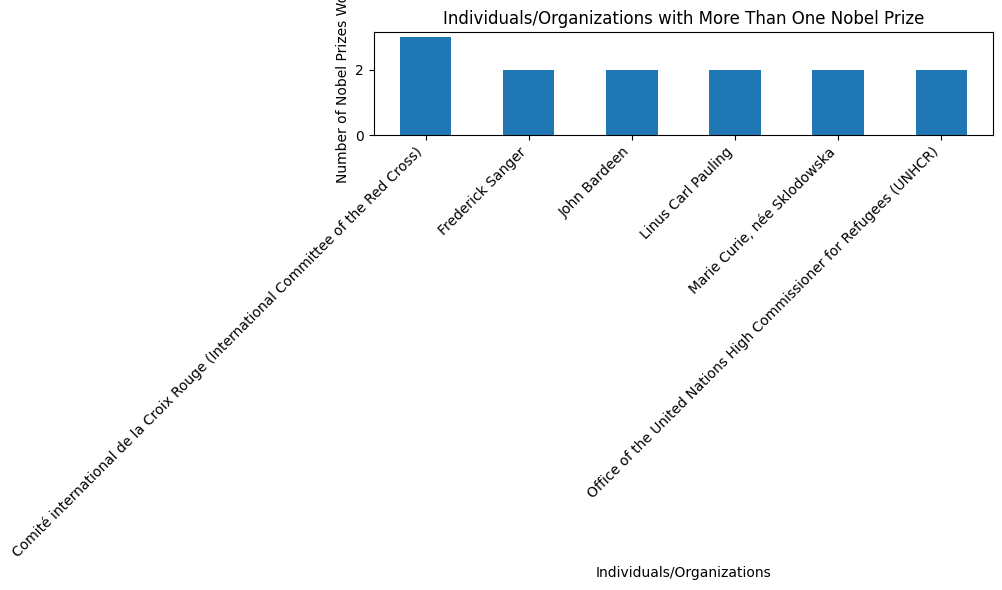

In [155]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
repeat_winners.plot(kind='bar')

# Adding labels and title
plt.xlabel('Individuals/Organizations')
plt.ylabel('Number of Nobel Prizes Won')
plt.title('Individuals/Organizations with More Than One Nobel Prize')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()